In [1]:
import numpy as np
import psrchive as psr
import matplotlib.pyplot as plt
import os
import astropy.stats as ast
from astropy.utils import NumpyRNGContext
import scipy.stats as scs
import pandas as pd
import seaborn as sns
%matplotlib notebook

## Fitting DM to Entire Data at once
Here we are analyzing post-fit residuals from 32 pulse integrated data which wew fitted for DM.
The frequency channels which were afftected from RFI ( which had high TOA error potentially due to RFI) were rejected via a select file in TEMPO2
The integrations which were affected due to bad data were not included in the data set 

In [2]:
cwd = os.getcwd()
os.chdir('/fred/oz005/users/akulkarn/J0437-4715/J0437-4715_meerkat_19May_22/Processed/timFiles')

In [3]:
#residuals_32p_Entire = np.loadtxt('res_All_pulses_1000.txt')  # Read post fit residuals_32p_Entire from a file into a numpy array.
residuals_32p_Entire_data = np.genfromtxt('PostRes_32pulint_Entire_NoBadObs_ChnRmd_all.txt')
residuals_32p_Entire_data = residuals_32p_Entire_data.reshape((-1,29,4))  ## Getting residuals_32p_Entire in a matrix [subint,freq]

##Deleting residuals corresponding to bad data
#residuals_32p_Entire=np.delete(residuals_32p_Entire,[538,539],0)
print(residuals_32p_Entire_data.shape)
residuals_32p_Entire=residuals_32p_Entire_data[:,:,2]
Freq_32p_Entire=np.mean(residuals_32p_Entire_data[:,:,1],axis=0)

#### Running bootstrap on residuals_32p_Entire to generate samples
with NumpyRNGContext(1):   
    bootresult_32p_Entire = ast.bootstrap(residuals_32p_Entire, 500)

(1373, 29, 4)


<IPython.core.display.Javascript object>


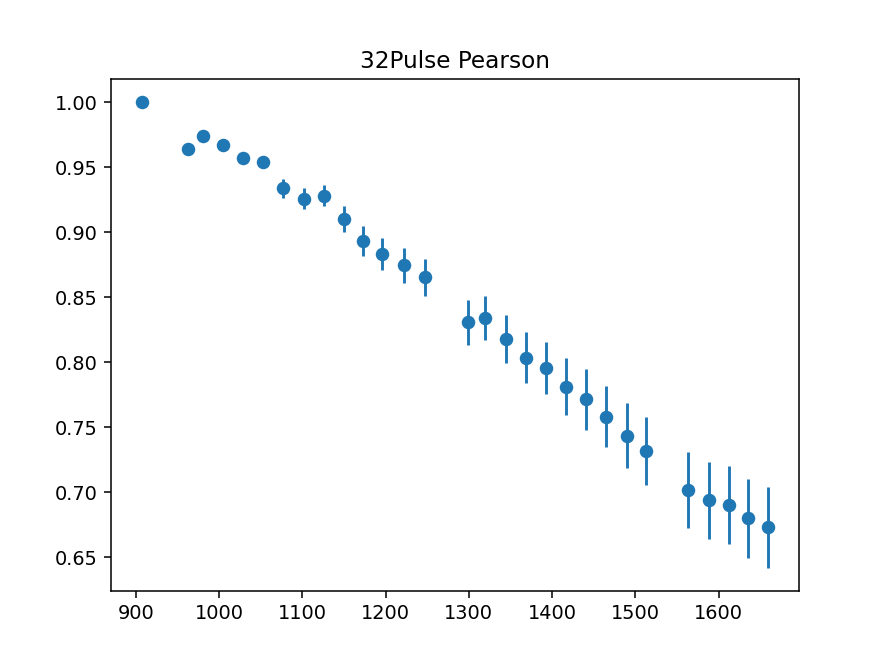

Text(0.5, 1.0, '32Pulse Pearson')

In [4]:
############### Pearson's Correlation Coefficient #################

### Create a mar=trix to store correlation coefficient for each sample of residuals
R_32p_Entire=np.ndarray([bootresult_32p_Entire.shape[0],bootresult_32p_Entire.shape[2],bootresult_32p_Entire.shape[2]])

## Calculate pearson Correlation coefficient for all samples
for i in range(bootresult_32p_Entire.shape[0]):
    R_32p_Entire[i,:,:]=np.corrcoef(bootresult_32p_Entire[i,:,:],rowvar=False)

##plotting the mean of correlation coefficient with oth channel as reference 
plt.figure()
plt.errorbar(Freq_32p_Entire,np.mean(R_32p_Entire[:,0,:],axis=0),yerr=1.96*(np.std(R_32p_Entire[:,0,:],axis=0)),fmt='o')
plt.title("32Pulse Pearson")

<IPython.core.display.Javascript object>


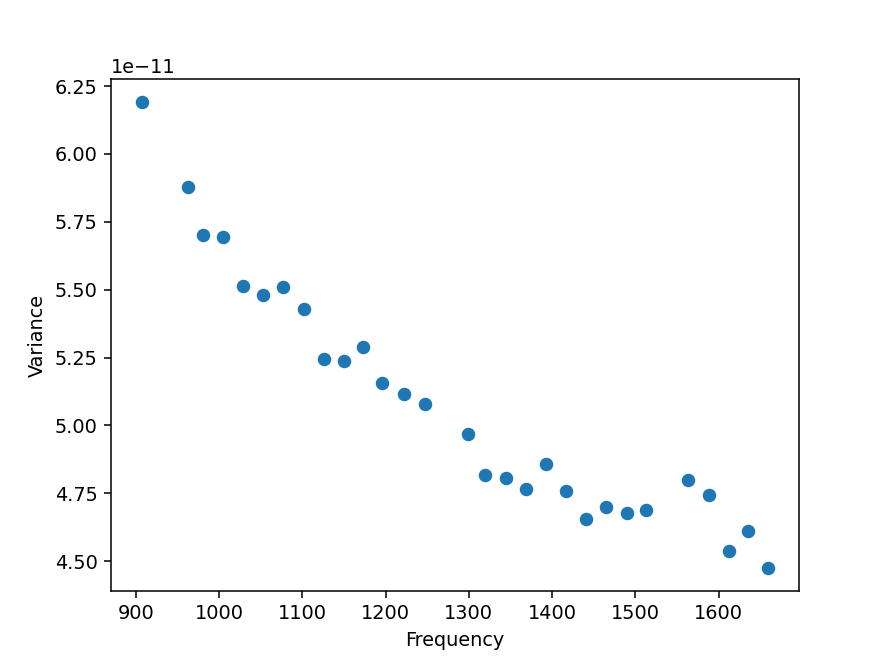

[1.00000000e+00 1.32939847e+04 1.49713381e-12]


/home/akulkarn/.conda/envs/py3/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [5]:
k_inv=4.1488e3

plt.figure()
toa_var_32p_Entire=np.var(residuals_32p_Entire,axis=0)
plt.scatter(Freq_32p_Entire,toa_var_32p_Entire)
from scipy.optimize import curve_fit
#var_dm=0.0000032041
def func(f,var_dm,C,var_n):
    return (np.divide(var_n*(f**1.8),C))

popt_32p_Entire, pcov_32p_Entire = curve_fit(func, Freq_32p_Entire, toa_var_32p_Entire)
#plt.plot(Freq,func(Freq,*popt_32p_Entire))
plt.xlabel("Frequency")
plt.ylabel("Variance")
print(popt_32p_Entire)


<IPython.core.display.Javascript object>


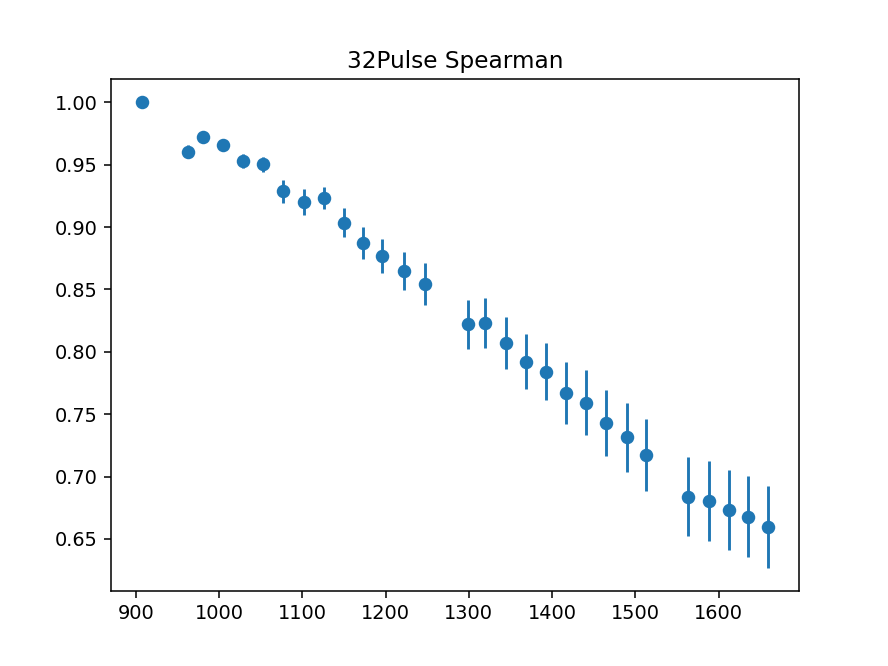

In [6]:
################### Spearman Correlation coefficient ##########
R_32p_Entire_spr=np.ndarray([bootresult_32p_Entire.shape[0],bootresult_32p_Entire.shape[2],bootresult_32p_Entire.shape[2]])
R_32p_Entire_spr_pval=np.ndarray([bootresult_32p_Entire.shape[0],bootresult_32p_Entire.shape[2],bootresult_32p_Entire.shape[2]])

for i in range(bootresult_32p_Entire.shape[0]):
    R_32p_Entire_spr[i,:,:]=scs.spearmanr(bootresult_32p_Entire[i,:,:],axis=0)[0]
    R_32p_Entire_spr_pval[i,:,:]=scs.spearmanr(bootresult_32p_Entire[i,:,:],axis=0)[1]

plt.figure()
plt.errorbar(Freq_32p_Entire,np.mean(R_32p_Entire_spr[:,0,:],axis=0),yerr=1.96*(np.std(R_32p_Entire_spr[:,0,:],axis=0)),fmt='o')
plt.title("32Pulse Spearman")
plt.show()

#os.chdir(cwd)

### Calculating the Variance in residuals generated from simulations of Ideal TOAs

In [7]:
cwd = os.getcwd()
os.chdir('/fred/oz005/users/akulkarn/J0437-4715/J0437-4715_meerkat_19May_22/Processed/timFiles')

In [8]:
#residuals_32p_SysNoise_Entire = np.loadtxt('res_All_pulses_1000.txt')  # Read post fit residuals_32p_SysNoise_Entire from a file into a numpy array.
residuals_32p_SysNoise_Entire_data = np.genfromtxt('PostRes_32pulint_Entire_NoBadObs_ChnRmd_SysNoise.txt')
residuals_32p_SysNoise_Entire_data = residuals_32p_SysNoise_Entire_data.reshape((-1,29,4))  ## Getting residuals_32p_SysNoise_Entire in a matrix [subint,freq]

##Deleting residuals corresponding to bad data
#residuals_32p_SysNoise_Entire=np.delete(residuals_32p_SysNoise_Entire,[538,539],0)
print(residuals_32p_SysNoise_Entire_data.shape)
residuals_32p_SysNoise_Entire=residuals_32p_SysNoise_Entire_data[:,:,2]
Freq_32p_SysNoise_Entire=np.mean(residuals_32p_SysNoise_Entire_data[:,:,1],axis=0)

#### Running bootstrap on residuals_32p_SysNoise_Entire to generate samples
with NumpyRNGContext(1):   
    bootresult_32p_SysNoise_Entire = ast.bootstrap(residuals_32p_SysNoise_Entire, 500)

(1373, 29, 4)


<IPython.core.display.Javascript object>


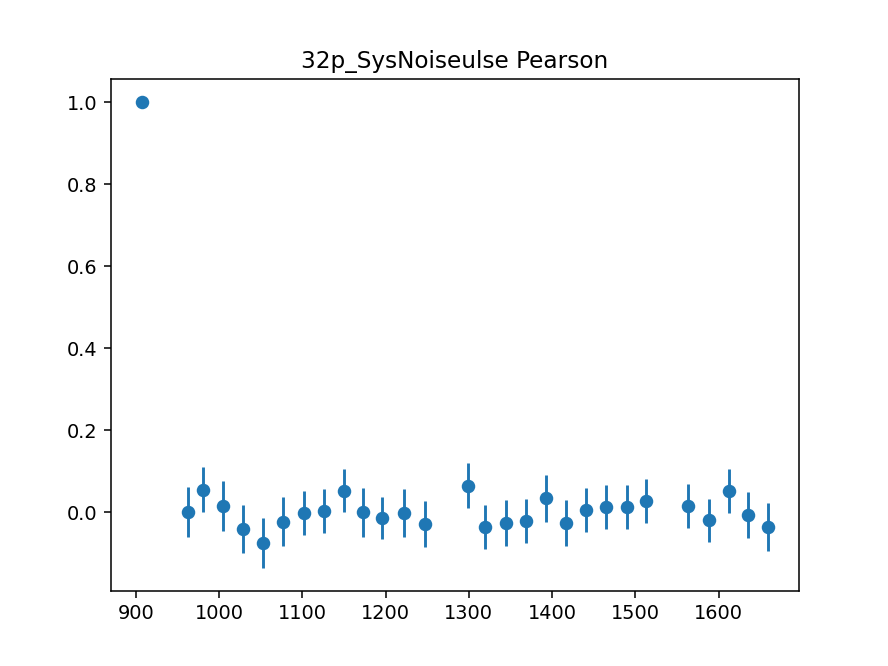

Text(0.5, 1.0, '32p_SysNoiseulse Pearson')

In [9]:
############### Pearson's Correlation Coefficient #################

### Create a mar=trix to store correlation coefficient for each sample of residuals
R_32p_SysNoise_Entire=np.ndarray([bootresult_32p_SysNoise_Entire.shape[0],bootresult_32p_SysNoise_Entire.shape[2],bootresult_32p_SysNoise_Entire.shape[2]])

## Calculate pearson Correlation coefficient for all samples
for i in range(bootresult_32p_SysNoise_Entire.shape[0]):
    R_32p_SysNoise_Entire[i,:,:]=np.corrcoef(bootresult_32p_SysNoise_Entire[i,:,:],rowvar=False)

##plotting the mean of correlation coefficient with oth channel as reference 
plt.figure()
plt.errorbar(Freq_32p_SysNoise_Entire,np.mean(R_32p_SysNoise_Entire[:,0,:],axis=0),yerr=1.96*(np.std(R_32p_SysNoise_Entire[:,0,:],axis=0)),fmt='o')
plt.title("32p_SysNoiseulse Pearson")

<IPython.core.display.Javascript object>


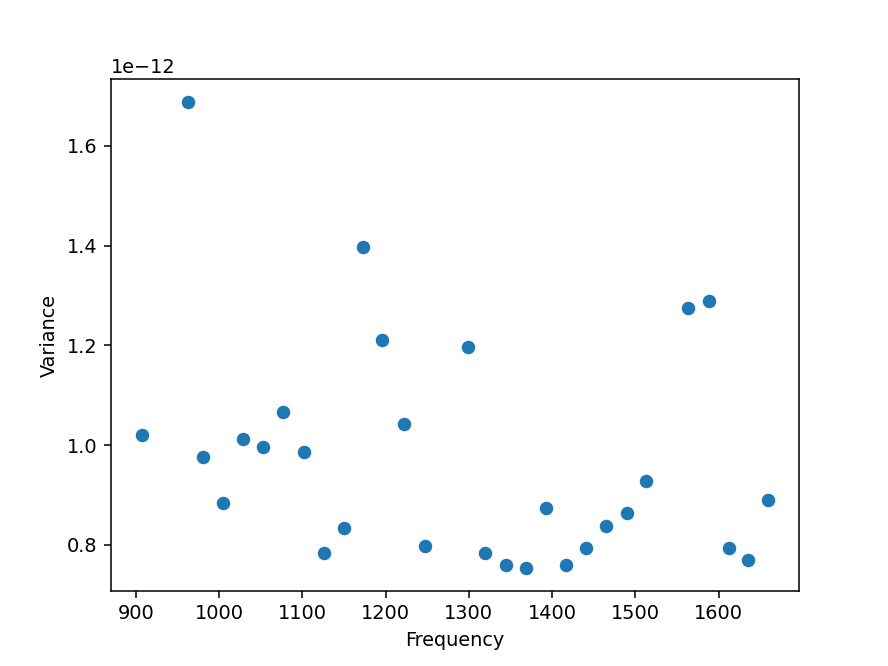

[1.00000000e+00 1.04952950e+05 2.31430252e-13]


/home/akulkarn/.conda/envs/py3/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [10]:
k_inv=4.1488e3

plt.figure()
toa_var_32p_SysNoise=np.var(residuals_32p_SysNoise_Entire,axis=0)
plt.scatter(Freq_32p_SysNoise_Entire,toa_var_32p_SysNoise)
from scipy.optimize import curve_fit
#var_dm=0.0000032041
def func(f,var_dm,C,var_n):
    return (np.divide(var_n*(f**1.8),C))

popt_32p_SysNoise_Entire, pcov_32p_SysNoise_Entire = curve_fit(func, Freq_32p_SysNoise_Entire, toa_var_32p_SysNoise)
#plt.plot(Freq,func(Freq,*popt_32p_SysNoise_Entire))
plt.xlabel("Frequency")
plt.ylabel("Variance")
print(popt_32p_SysNoise_Entire)


<IPython.core.display.Javascript object>


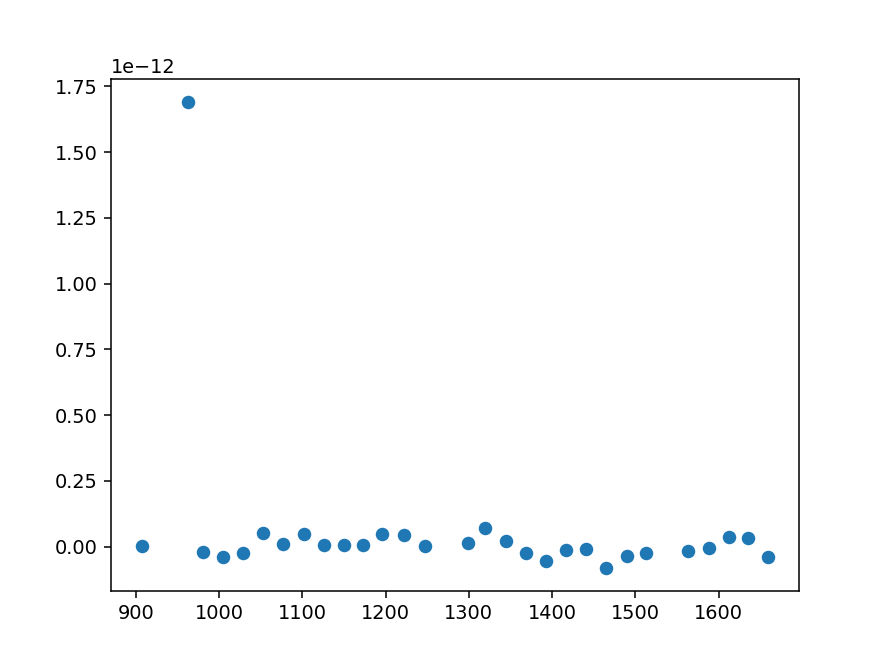

In [11]:
covrn_32p_SysNoise_Entire=np.cov(residuals_32p_SysNoise_Entire,rowvar=False)

plt.figure()

plt.scatter(Freq_32p_SysNoise_Entire,covrn_32p_SysNoise_Entire[1,:])
#plt.scatter(Freq_32p_SysNoise_Entire,np.cov(residuals_32p_SysNoise_Entire,rowvar=False)[-1,:])
#for i in range(15):
 #   plt.scatter(Freq_32p_SysNoise_Entire,np.cov(residuals_32p_SysNoise_Entire,rowvar=False)[i,:])

<IPython.core.display.Javascript object>


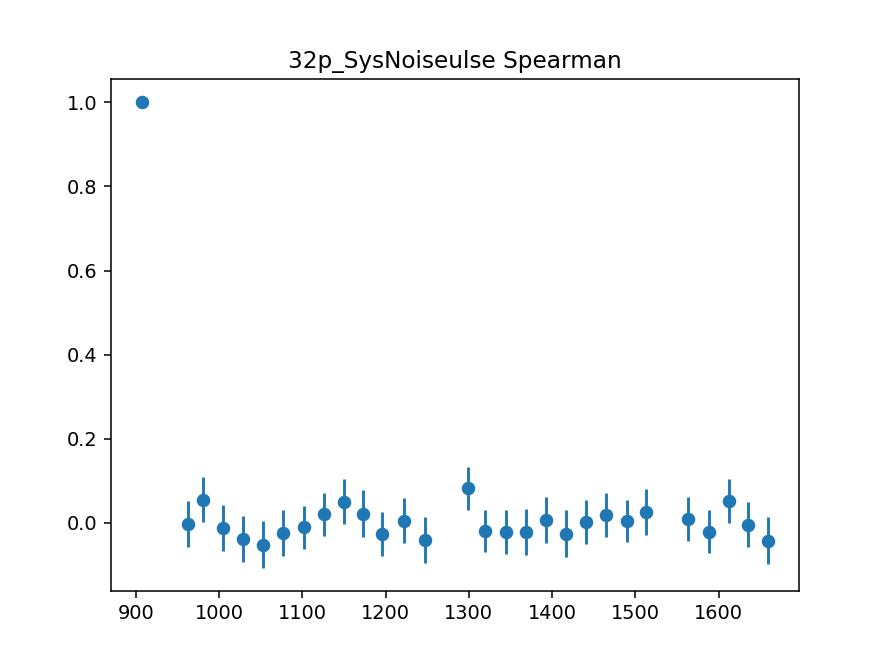

In [12]:
################### Spearman Correlation coefficient ##########
R_32p_SysNoise_Entire_spr=np.ndarray([bootresult_32p_SysNoise_Entire.shape[0],bootresult_32p_SysNoise_Entire.shape[2],bootresult_32p_SysNoise_Entire.shape[2]])
R_32p_SysNoise_Entire_spr_pval=np.ndarray([bootresult_32p_SysNoise_Entire.shape[0],bootresult_32p_SysNoise_Entire.shape[2],bootresult_32p_SysNoise_Entire.shape[2]])

for i in range(bootresult_32p_SysNoise_Entire.shape[0]):
    R_32p_SysNoise_Entire_spr[i,:,:]=scs.spearmanr(bootresult_32p_SysNoise_Entire[i,:,:],axis=0)[0]
    R_32p_SysNoise_Entire_spr_pval[i,:,:]=scs.spearmanr(bootresult_32p_SysNoise_Entire[i,:,:],axis=0)[1]

plt.figure()
plt.errorbar(Freq_32p_SysNoise_Entire,np.mean(R_32p_SysNoise_Entire_spr[:,0,:],axis=0),yerr=1.96*(np.std(R_32p_SysNoise_Entire_spr[:,0,:],axis=0)),fmt='o')
plt.title("32p_SysNoiseulse Spearman")
plt.show()

#os.chdir(cwd)

#### Subtracting the variance of system noise from the variance of Residuals to obtain Variance due to apparent DM term

<IPython.core.display.Javascript object>


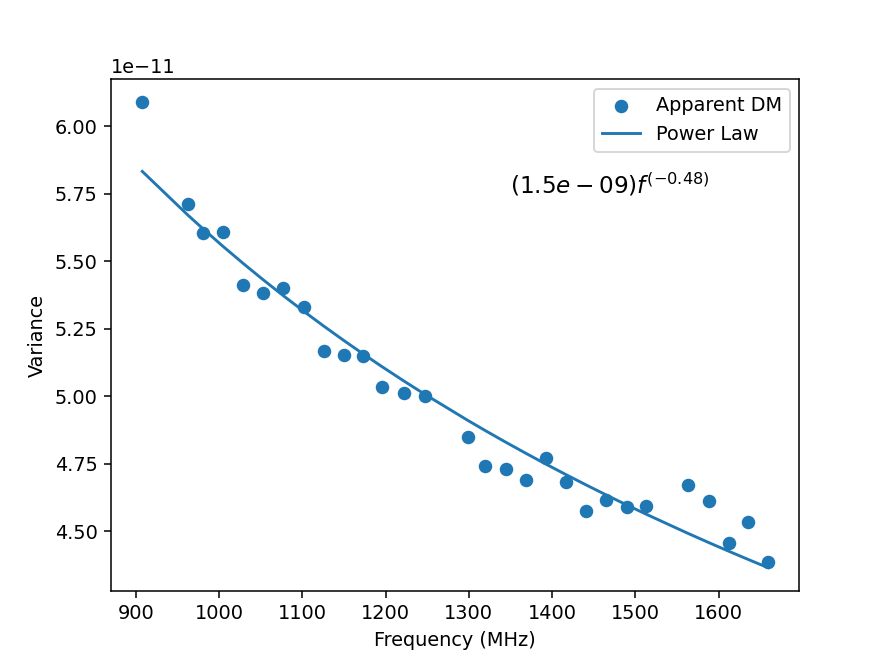

[ 1.53474634e-09 -4.80112429e-01]


In [13]:
toa_var_32p_DMterm=np.subtract(toa_var_32p_Entire,toa_var_32p_SysNoise)
plt.figure()
#plt.scatter(Freq_32p_Entire,toa_var_32p_Entire,label="Residuals")
plt.scatter(Freq_32p_Entire,toa_var_32p_DMterm,label="Apparent DM")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Variance")
plt.legend()

def func_powerlaw(Freq,A,Alpha):
    return (A*(Freq**Alpha))

popt_32p_powerlaw, pcov_32p_powerlaw = curve_fit(func_powerlaw,Freq_32p_Entire,toa_var_32p_DMterm)
plt.plot(Freq_32p_Entire,func_powerlaw(Freq_32p_Entire,*popt_32p_powerlaw),label="Power Law")
plt.text(1350,5.75e-11,r'$(%.1e)$'%popt_32p_powerlaw[0]+r'$f^{(%.2f)}$'%popt_32p_powerlaw[1],fontsize=12)
plt.legend()

print(popt_32p_powerlaw)

<IPython.core.display.Javascript object>


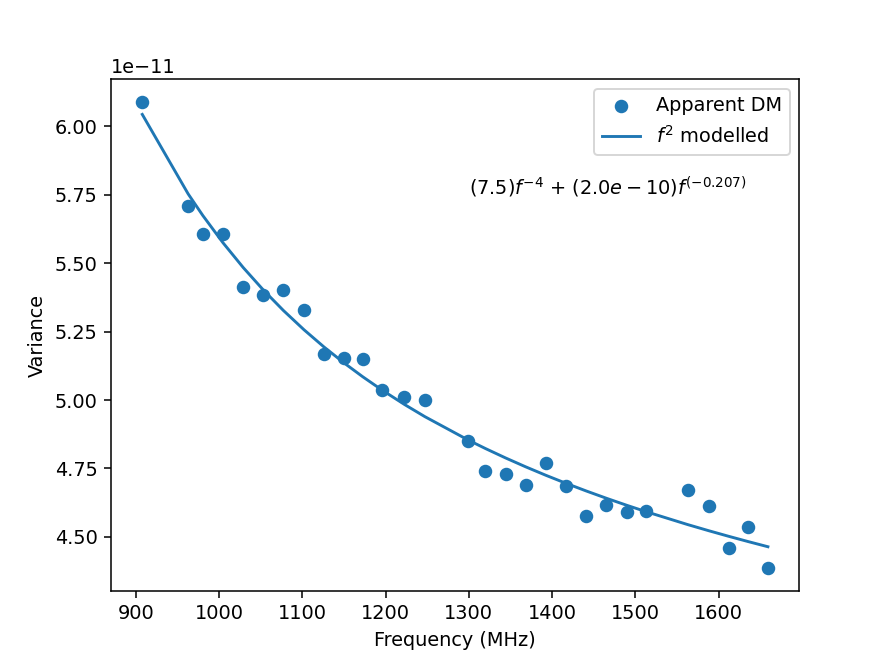

[ 7.45917842e+00  2.02506381e-10 -2.06963368e-01]


In [14]:
def func_fsqr_modelled(Freq,A,B,Beta):
    return((A*(Freq**-4))+B*(Freq**Beta))

popt_32p_fsqr_modelled, pcov_32p_fsqr_modelled = curve_fit(func_fsqr_modelled,Freq_32p_Entire,toa_var_32p_DMterm)

plt.figure()
plt.scatter(Freq_32p_Entire,toa_var_32p_DMterm,label="Apparent DM")
plt.plot(Freq_32p_Entire,func_fsqr_modelled(Freq_32p_Entire,*popt_32p_fsqr_modelled),label=r'$f^{2}$ ' +"modelled")
txtstr=(r'$(%.1f)$'%popt_32p_fsqr_modelled[0]+r'$f^{-4}$ + ')+(r'$(%.1e)$'%popt_32p_fsqr_modelled[1]+r'$f^{(%.3f)}$'%popt_32p_fsqr_modelled[2])
plt.text(1300,5.75e-11,txtstr,fontsize=10)
plt.xlabel("Frequency (MHz)")
plt.ylabel("Variance")
plt.legend()

print(popt_32p_fsqr_modelled)

<IPython.core.display.Javascript object>


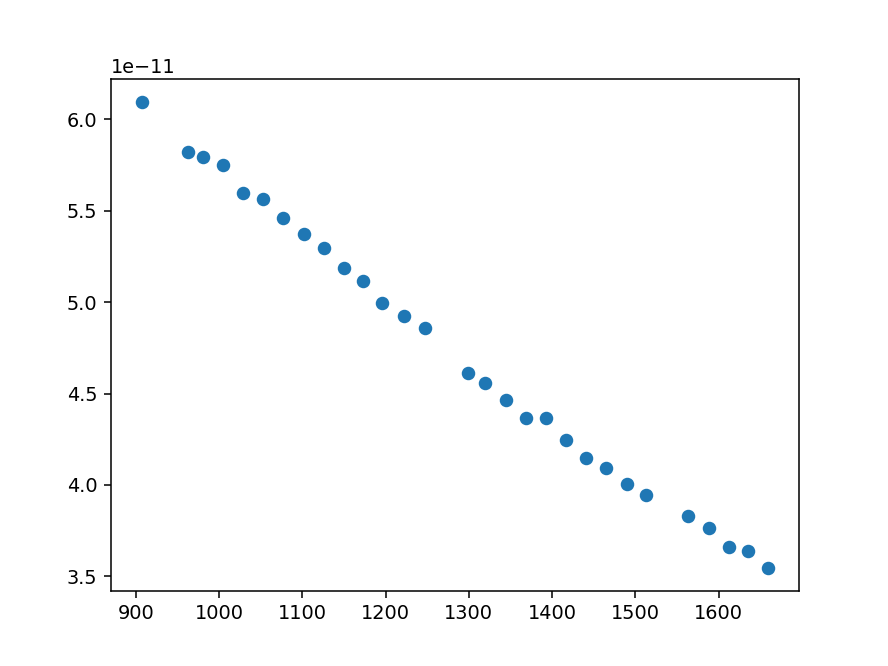

In [15]:
covrn_32p_Entire=np.cov(residuals_32p_Entire,rowvar=False)
temp=covrn_32p_Entire.copy()
for i in range(residuals_32p_Entire.shape[1]):
    covrn_32p_Entire[i,i]=covrn_32p_Entire[i,i]-covrn_32p_SysNoise_Entire[i,i]

plt.figure()

plt.scatter(Freq_32p_Entire,covrn_32p_Entire[0,:])


#plt.scatter(Freq_32p_Entire,np.cov(residuals_32p_Entire,rowvar=False)[-1,:])
#for i in range(15):
 #   plt.scatter(Freq_32p_Entire,np.cov(residuals_32p_Entire,rowvar=False)[i,:])

In [22]:
###############Running Bootstrap on the data packet ####################

res_sysres_32p_Entire=residuals_32p_Entire_data[:,:,2]
res_sysres_32p_Entire=np.append(res_sysres_32p_Entire,residuals_32p_SysNoise_Entire_data[:,:,2],axis=1)#.reshape((-1,)+res_var_32p_Entire.shape)
(res_sysres_32p_Entire).shape
#### Running bootstrap on residuals_32p_SysNoise_Entire to generate samples
with NumpyRNGContext(1):   
    bootresult = ast.bootstrap(res_sysres_32p_Entire, 500)
    
bootresult_res_32p_Entire=bootresult[:,:,0:29]
bootresult_sysres_32p_Entire=bootresult[:,:,29:58]

toa_var_res_32p=np.var(bootresult_res_32p_Entire[:,:,:],axis=1)
toa_var_sysres_32p=np.var(bootresult_sysres_32p_Entire[:,:,:],axis=1)
Cov_res_32p=np.asarray([np.cov(bootresult_res_32p_Entire[i],rowvar=False) for i in range(bootresult_res_32p_Entire.shape[0])])
Cov_sysres_32p=np.asarray([np.cov(bootresult_sysres_32p_Entire[i],rowvar=False) for i in range(bootresult_sysres_32p_Entire.shape[0])])

# for j in range(Cov_res_32p.shape[0]):
#     for i in range(Cov_res_32p.shape[1]):
#         Cov_res_32p[j,i,i]=Cov_res_32p[j,i,i]-Cov_sysres_32p[j,i,i]
Cov_res_32p=Cov_res_32p-Cov_sysres_32p

std_matrix=np.asarray([np.matmul(np.matrix(np.sqrt(toa_var_res_32p[i]-toa_var_sysres_32p[i])).T, \
                               np.matrix(np.sqrt(toa_var_res_32p[i]-toa_var_sysres_32p[i]))) \
                    for i in range(bootresult_res_32p_Entire.shape[0])])


In [23]:
CorCoef=np.asarray([np.divide(Cov_res_32p[i],std_matrix[i]) for i in range(bootresult_res_32p_Entire.shape[0])])

<IPython.core.display.Javascript object>


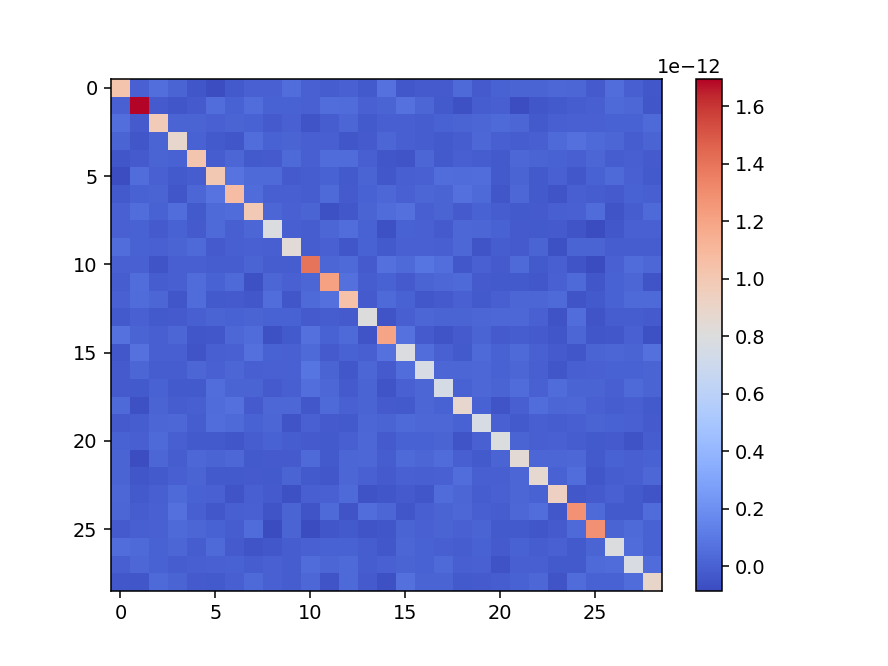

In [20]:
plt.figure()
plt.imshow(np.mean(Cov_sysres_32p,axis=0),aspect='auto',cmap='coolwarm')
plt.colorbar()

<IPython.core.display.Javascript object>


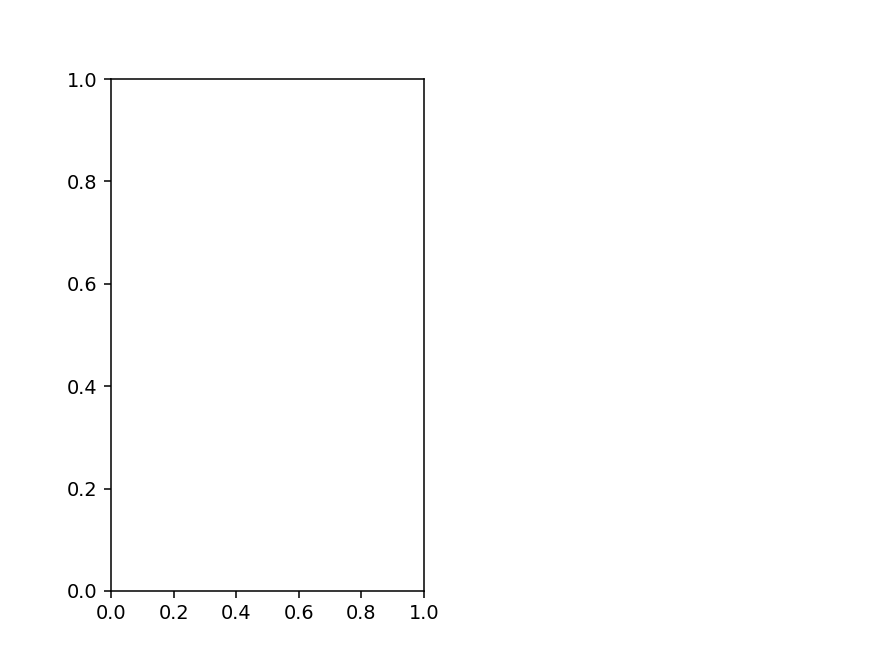

NameError: name 'Cov_res_sysres_32p' is not defined

In [18]:
plt.figure()
plt.subplot(1,2,1)
plt.imshow(std_matrix[2],vmin=np.min([std_matrix,Cov_res_sysres_32p]),vmax=np.max([std_matrix,Cov_res_sysres_32p]))
plt.subplot(1,2,2)
plt.imshow(Cov_res_sysres_32p[2],vmin=np.min([std_matrix,Cov_res_sysres_32p]),vmax=np.max([std_matrix,Cov_res_sysres_32p]))


<IPython.core.display.Javascript object>


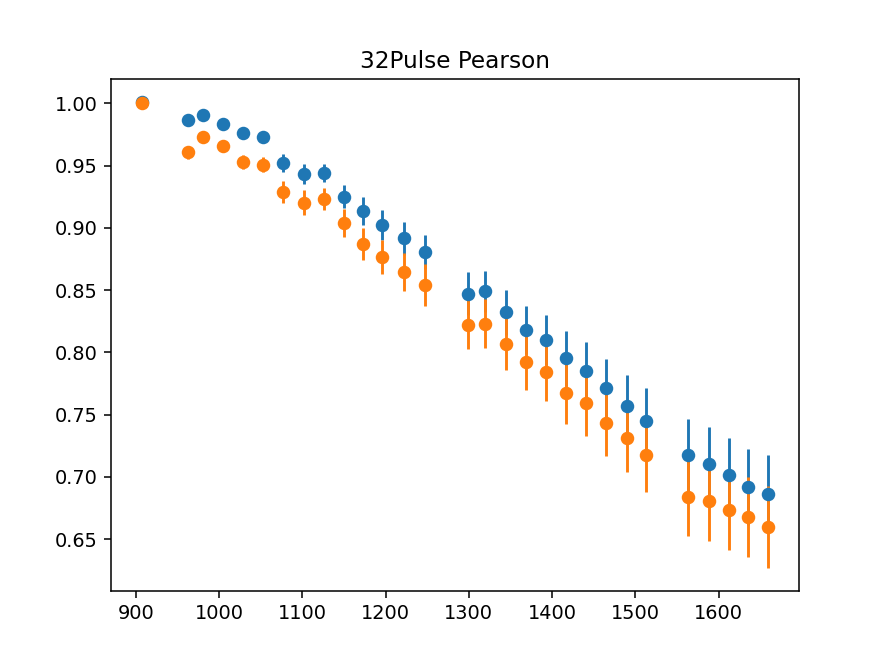

<IPython.core.display.Javascript object>


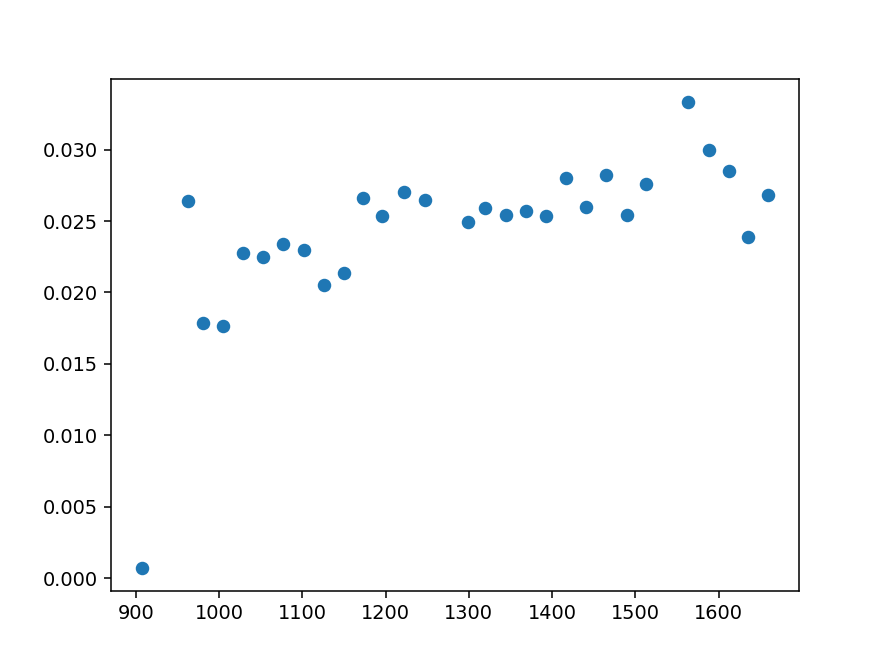

In [24]:
f=0
plt.figure()
plt.errorbar(Freq_32p_Entire,np.mean(CorCoef[:,f,:],axis=0),yerr=1.96*(np.std(CorCoef[:,f,:],axis=0)),fmt='o')
plt.errorbar(Freq_32p_Entire,np.mean(R_32p_Entire_spr[:,f,:],axis=0),yerr=1.96*(np.std(R_32p_Entire_spr[:,f,:],axis=0)),fmt='o')
plt.title("32Pulse Pearson")
plt.figure()
plt.scatter(Freq_32p_Entire,np.mean(CorCoef[:,f,:],axis=0)-np.mean(R_32p_Entire_spr[:,f,:],axis=0))

In [ ]:
plt.figure()
plt.subplot(1,2,1)
plt.imshow(np.mean(CorCoef[:,:,:],axis=0),vmax=1)
plt.subplot(1,2,2)
plt.imshow(np.mean(R_32p_Entire_spr[:,:,:],axis=0),vmax=1)


In [ ]:
############### Pearson's Correlation Coefficient Without System Noise#################

### Create a mar=trix to store correlation coefficient for each sample of residuals
Cov_32p_Entire=np.ndarray([bootresult_32p_Entire.shape[0],bootresult_32p_Entire.shape[2],bootresult_32p_Entire.shape[2]])

## Calculate Covariance for all samples
for i in range(bootresult_32p_Entire.shape[0]):
    Cov_32p_Entire[i,:,:]=np.cov(bootresult_32p_Entire[i,:,:],rowvar=False)
    Cov_32p_Entire[i,:,:]=np.divide(Cov_32p_Entire[i,:,:],a)

##plotting the mean of correlation coefficient with oth channel as reference 
plt.figure()
plt.errorbar(Freq_32p_Entire,np.mean(Cov_32p_Entire[:,0,:],axis=0),yerr=1.96*(np.std(Cov_32p_Entire[:,0,:],axis=0)),fmt='o')
plt.errorbar(Freq_32p_Entire,np.mean(R_32p_Entire_spr[:,0,:],axis=0),yerr=1.96*(np.std(R_32p_Entire_spr[:,0,:],axis=0)),fmt='o')
plt.title("32Pulse Pearson")

In [ ]:
np.cov(bootresult_32p_Entire[1,:,:],rowvar=False)

### Fitting a power law from the individual DM fit dataset  

In [ ]:
cwd = os.getcwd()
os.chdir('/fred/oz005/users/akulkarn/J0437-4715/J0437-4715_meerkat_19May_22/Processed/timFiles')

In [ ]:
#residuals_32p_Individual_Entire = np.loadtxt('res_All_pulses_1000.txt')  # Read post fit residuals_32p_Individual_Entire from a file into a numpy array.
residuals_32p_Individual_data = np.genfromtxt('PostRes_32pulint_Individual_NoBadObs_ChnRmd_all.txt')
residuals_32p_Individual_data = residuals_32p_Individual_data.reshape((-1,29,4))  ## Getting residuals_32p_Individual_Entire in a matrix [subint,freq]

##Deleting residuals corresponding to bad data
#residuals_32p_Individual_Entire=np.delete(residuals_32p_Individual_Entire,[538,539],0)
print(residuals_32p_Individual_data.shape)
residuals_32p_Individual=residuals_32p_Individual_data[:,:,2]
Freq_32p_Individual=np.mean(residuals_32p_Individual_data[:,:,1],axis=0)

#### Running bootstrap on residuals_32p_Individual_Entire to generate samples
with NumpyRNGContext(1):   
    bootresult_32p_Individual = ast.bootstrap(residuals_32p_Individual, 500)

In [ ]:
############### Pearson's Correlation Coefficient #################

### Create a mar=trix to store correlation coefficient for each sample of residuals
R_32p_Individual=np.ndarray([bootresult_32p_Individual.shape[0],bootresult_32p_Individual.shape[2],bootresult_32p_Individual.shape[2]])

## Calculate pearson Correlation coefficient for all samples
for i in range(bootresult_32p_Individual.shape[0]):
    R_32p_Individual[i,:,:]=np.corrcoef(bootresult_32p_Individual[i,:,:],rowvar=False)

##plotting the mean of correlation coefficient with oth channel as reference 
plt.figure()
plt.errorbar(Freq_32p_Individual,np.mean(R_32p_Individual[:,0,:],axis=0),yerr=1.96*(np.std(R_32p_Individual[:,0,:],axis=0)),fmt='o')
plt.title("32p_Individualulse Pearson")

In [ ]:
k_inv=4.1488e3

plt.figure()
toa_var_32p_Individual=np.var(residuals_32p_Individual,axis=0)
plt.scatter(Freq_32p_Individual,toa_var_32p_Individual)
from scipy.optimize import curve_fit
#var_dm=0.0000032041
def func(f,var_dm,C,var_n):
    return (np.divide(var_n*(f**1.8),C))

popt_32p_Individual, pcov_32p_Individual = curve_fit(func, Freq_32p_Individual, toa_var_32p_Individual)
#plt.plot(Freq,func(Freq,*popt_32p_Individual))
plt.xlabel("Frequency")
plt.ylabel("Variance")
print(popt_32p_Individual)


In [ ]:
covrn_32p_Individual=np.cov(residuals_32p_Individual,rowvar=False)[0,:]

plt.figure()

plt.scatter(Freq_32p_Individual,covrn_32p_Individual)
#plt.scatter(Freq_32p_Individual,np.cov(residuals_32p_Individual,rowvar=False)[-1,:])
#for i in range(15):
 #   plt.scatter(Freq_32p_Individual,np.cov(residuals_32p_Individual,rowvar=False)[i,:])

In [ ]:
################### Spearman Correlation coefficient ##########
R_32p_Individual_spr=np.ndarray([bootresult_32p_Individual.shape[0],bootresult_32p_Individual.shape[2],bootresult_32p_Individual.shape[2]])
R_32p_Individual_spr_pval=np.ndarray([bootresult_32p_Individual.shape[0],bootresult_32p_Individual.shape[2],bootresult_32p_Individual.shape[2]])

for i in range(bootresult_32p_Individual.shape[0]):
    R_32p_Individual_spr[i,:,:]=scs.spearmanr(bootresult_32p_Individual[i,:,:],axis=0)[0]
    R_32p_Individual_spr_pval[i,:,:]=scs.spearmanr(bootresult_32p_Individual[i,:,:],axis=0)[1]

plt.figure()
plt.errorbar(Freq_32p_Individual,np.mean(R_32p_Individual_spr[:,0,:],axis=0),yerr=1.96*(np.std(R_32p_Individual_spr[:,0,:],axis=0)),fmt='o')
plt.title("32p_Individualulse Spearman")
plt.show()

#os.chdir(cwd)

In [ ]:
plt.figure()
plt.scatter(Freq_32p_SysNoise_Entire,toa_var_32p_SysNoise,label="System Noise Simulated")
plt.scatter(Freq_32p_Individual,toa_var_32p_Individual,label="Individual")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Variance")
plt.legend()

In [ ]:
def func_dm_removed_powerlaw(Freq,B,Beta):
    return(B*(Freq**Beta))

popt_32p_dm_removed_powerlaw, pcov_32p_dm_removed_powerlaw = curve_fit(func_dm_removed_powerlaw,Freq_32p_Individual,toa_var_32p_Individual)

plt.figure()
plt.scatter(Freq_32p_Individual,toa_var_32p_Individual,label="Individual")
plt.plot(Freq_32p_Entire,func_dm_removed_powerlaw(Freq_32p_Entire,*popt_32p_dm_removed_powerlaw),label="dm_removed_powerlaw")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Variance")
plt.legend()

print(popt_32p_dm_removed_powerlaw)

In [ ]:
df_Corr_Entire=pd.DataFrame(np.mean(R_32p_Entire_spr[:,:,:],axis=0),index=(Freq_32p_Entire.astype(int)).astype(str),columns=(Freq_32p_Entire.astype(int)).astype(str))
df_Corr_Individual=pd.DataFrame(np.mean(R_32p_Individual_spr[:,:,:],axis=0),index=(Freq_32p_Individual.astype(int)).astype(str),columns=(Freq_32p_Individual.astype(int)).astype(str))

Fig, Axs = plt.subplots(2,1,)
g1=sns.heatmap(df_Corr_Entire,vmin=-1,vmax=1,ax=Axs[0],cmap='coolwarm')
Axs[0].set_xlabel("Frequency(MHz)")

Axs[0].set_ylabel("Frequency(MHz)")
g2=sns.heatmap(df_Corr_Individual,vmin=-1,vmax=1,ax=Axs[1],cmap='coolwarm')

Axs[1].set_xlabel("Frequency(MHz)")
Axs[1].set_ylabel("Frequency(MHz)")
#plt.show()

In [ ]:
plt.figure()
plt.subplot(1,2,1)
plt.imshow(np.mean(R_32p_Individual[:,:,:],axis=0),vmin=-1,vmax=1,cmap='coolwarm')
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(np.mean(R_32p_SysNoise_Entire_spr[:,:,:],axis=0),vmin=-1,vmax=1,cmap='coolwarm')
plt.colorbar()
